In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import simple_slider
import astropy.constants as c 

au    = c.au.cgs.value
M_jup = c.M_jup.cgs.value
M_sun = c.M_sun.cgs.value

%matplotlib notebook

In [2]:
np.array([[9.08764856e-05, 1.84523828e-04, 7.97577341e-04],
       [2.58948196e-04, 7.02904708e-04, 5.51527006e-04],
        [2.59866944e-04, 2.96340948e-04, 1.79784662e-03]])*(2.3*M_sun)/M_jup

array([[0.21895787, 0.44459184, 1.92168339],
       [0.62390996, 1.69357908, 1.32884955],
       [0.62612359, 0.71400408, 4.33173288]])

In [3]:
np.array([[6.30432947e-05, 1.53973398e-03],
       [1.70368476e-04, 2.89160754e-03]])*(2.3*M_sun)/M_jup

np.array([0.00021169455647519422, 0.0003497507653180631, 0.00048728112632480923])*(2.3*M_sun)/M_jup

array([0.51005701, 0.84268973, 1.17405548])

In [182]:
choose=14

switcher = {0:"data_1_planet", 1:"data_one_planet_a1e-2_M1e-3",2:"data_one_planet_a1e-2_M4e-4",
            3:"data_one_planet_a1e-3_M1e-3",4:"data_one_planet_a1e-3_M4e-4", 
            6:"data_planets_scalefree_a1e-2_mu1e-3_r100", 5:"data_planets_scalefree_a1e-2_mu3e-3_r100",
            7:"data_planets_scalefree_a1e-2_mu3e-4_r100", 9:"data_planets_scalefree_a1e-3_mu1e-3_r100",
            8:"data_planets_scalefree_a1e-3_mu3e-3_r100", 10:"data_planets_scalefree_a1e-3_mu3e-4_r100",
            12:"data_planets_scalefree_a1e-4_mu1e-3_r100", 11:"data_planets_scalefree_a1e-4_mu3e-3_r100", 
            13:"data_planets_scalefree_a1e-4_mu3e-4_r100", 14:"data_planets_scalefree_3planets",
            15:"data_planets_scalefree_a1e-3_3planets", 16:"data_3_planets"}

"""
if gl_n_planets == 3 and choose != 14:
    data_dir = simple_slider.pkg_resources.resource_filename(simple_slider.__name__, 'data_3_planets')
else:
"""   
data_dir = simple_slider.pkg_resources.resource_filename(simple_slider.__name__, switcher[choose])


r = (np.loadtxt(os.path.join(data_dir, 'radius.dat')))
phi = (np.loadtxt(os.path.join(data_dir, 'phi.dat')))
av_dat = (np.loadtxt(os.path.join(data_dir, 'sigma_averaged.dat')))[-1]
sigma2D = np.loadtxt(os.path.join(data_dir, 'surfacedensity2D.dat'), unpack=1)
relerr = (np.loadtxt(os.path.join(data_dir, 'relative_error.dat')))

n_points = len(r)
r_log = np.logspace(np.log10(r[0]), np.log10(r[-1]), n_points) * au

In [158]:
r.shape, phi.shape, sigma2D.shape

((1024,), (768,), (768, 1024))

In [159]:
phi[-1]

3.137502

In [160]:
phi = np.insert(phi,0,-np.pi)
sigma2D = np.insert(sigma2D,0,(sigma2D[0]+sigma2D[-1])/2, axis=0)

In [161]:
r.shape, phi.shape, sigma2D.shape

((1024,), (769,), (769, 1024))

<IPython.core.display.Javascript object>


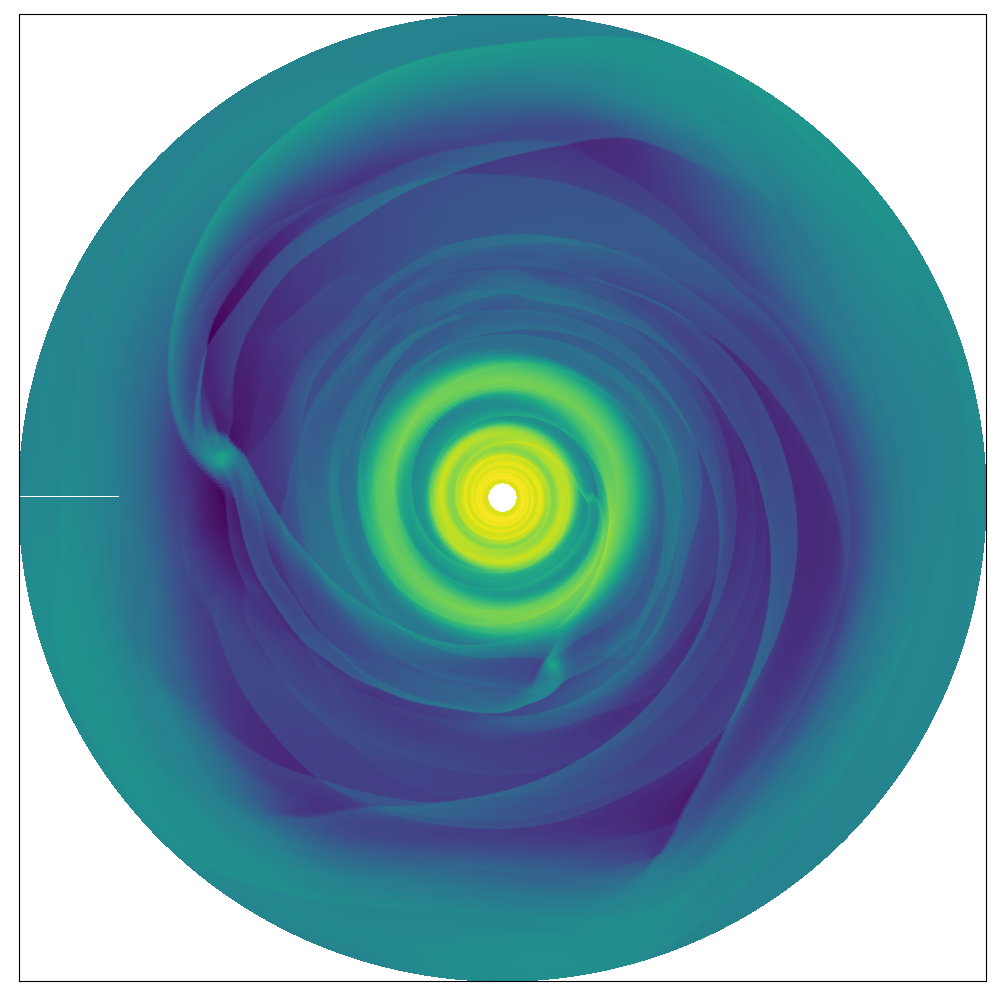

In [162]:
sigma2D.shape
R, PHI = np.meshgrid(np.log2(r/np.min(r)*1.1),phi, indexing='xy')
R, PHI = np.meshgrid(r,phi, indexing='xy')
x,y = R*np.cos(PHI), R*np.sin(PHI)
#x.shape, y.shape, sigma2D.shape

#ax = plt.subplot(projection='polar')
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_xlim([np.min(r), np.max(r)])
#plt.xlim(np.log10(16*au), np.log10(466*au))

#plt.xscale('symlog', linthreshx=np.min(r)*20)
#plt.yscale('symlog', linthreshy=np.min(r)*20)
im = ax.pcolormesh(x,y, np.log10(sigma2D));
#fig.colorbar(im,ax=ax)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout(pad=1)
#plt.savefig('sig2D_C'+str(choose)+'.png')

In [164]:
np.sqrt((7.4e14)**2+(1.7e12)**2)/au, np.sqrt((7.8e14)**2+(6.78e14)**2)/au

(49.46607523472768, 69.08397090938689)

In [165]:
med = np.median(sigma2D, axis=0)
med

array([19.682    , 19.05683  , 18.40755  , ...,  0.5681886,  0.5669541,
        0.5664098])

In [189]:
av_dat/ave

array([1.00036082, 1.0003951 , 1.00068202, ..., 0.97072191, 0.97065666,
       0.97060833])

<IPython.core.display.Javascript object>


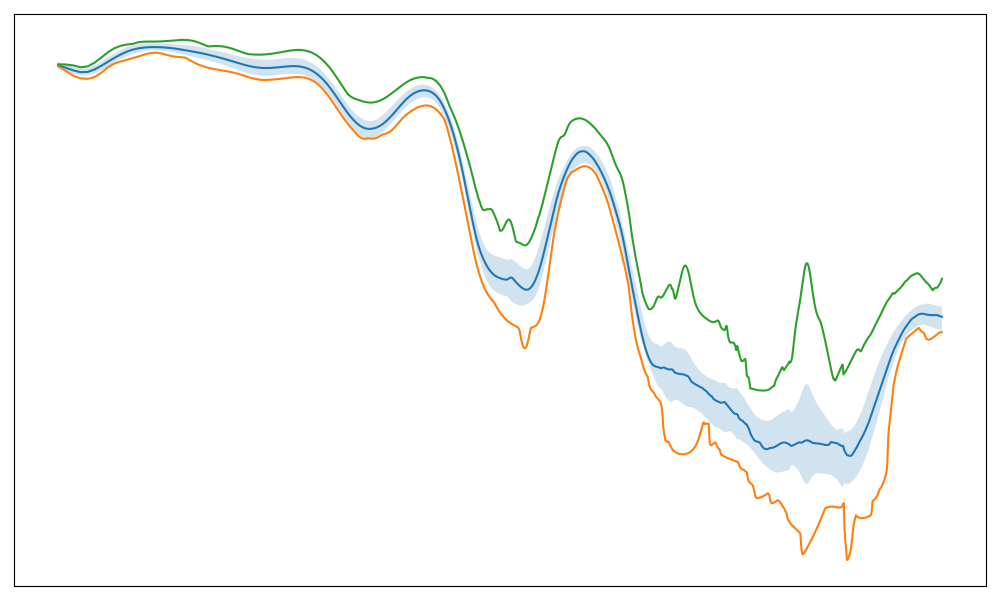

In [187]:
ave = np.average(sigma2D[1:], axis=0)
a_min = np.min(sigma2D, axis=0)
a_max = np.max(sigma2D, axis=0)
#relerr=0.15
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2 = plt.loglog(r/au, ave)
ax2 = plt.fill_between(r/au, av_dat*(1+relerr), av_dat/(1+relerr), alpha=0.2)
ax2 = plt.loglog(r/au, a_min)
ax2 = plt.loglog(r/au, a_max)
#ax2 = plt.loglog(r/au, med, color='black')
#ax2 = plt.loglog(r/au, med)
#ax2 = plt.fill_between(r/au,med*(1+relerr), med/(1+relerr), alpha=0.2)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)
plt.tight_layout(pad=1)
#ax2.set_yticks([])
#plt.savefig('sig2D_C'+str(choose)+'_witherror.png')

In [32]:
import matplotlib.cm as cm 
from scipy import integrate


Z = 1
a_0 = 1
pi = np.pi

def sqrt(xas):
    return np.sqrt(xas)

n = 300
x1 = np.linspace(-10, 10, n) 
x2 = np.linspace(-10,10, n) 
X1, X2 = np.meshgrid(x1,x2) 


def r(x,y):
    return sqrt(x**2 + y**2)

def psi(x,y):
    return 1/(4*sqrt(2*pi))*(Z/a_0)**(3/2) * Z*r(x,y)/a_0*np.exp(-Z*r(x,y)/(2*a_0))*x/r(x,y)



"""plt.pcolormesh(X1,X2,psi(X1,X2)**2)

plt.axis('equal')
plt.show()"""
psi(X1,X2).shape, X1.shape, X2.shape, x1.shape

((300, 300), (300, 300), (300, 300), (300,))